# Required Header Files

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid',palette='muted',font_scale=1.5)
rcParams['figure.figsize']=22,10

# Reading the Dataset

In [2]:
df=pd.read_excel("xproject.xlsx")

In [3]:
df

,Count_month,Monthly_ADT
0,2015-01-01,1123
1,2015-02-01,2345
2,2015-03-01,4567
3,2015-04-01,1222
4,2015-05-01,3014
5,2015-06-01,3225
6,2015-07-01,1679
7,2015-08-01,3678
8,2015-09-01,1666
9,2015-10-01,1298


In [220]:
df.describe()


,Monthly_ADT
count,36.000000
mean,2171.277778
std,772.754465
min,1117.000000
25%,1675.750000
50%,2041.500000
75%,2499.250000
max,4567.000000


In [221]:
df.dtypes

Count_month    datetime64[ns]
Monthly_ADT             int64
dtype: object

In [222]:
col_mask=df.isnull().any(axis=0) 
row_mask=df.isnull().any(axis=1)
df.loc[row_mask,col_mask]

""


In [223]:
df.Count_Start_Date = pd.to_datetime(df.Count_month)
df.set_index('Count_month', inplace=True)

/Users/appleretina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


# Plotting the Dataset


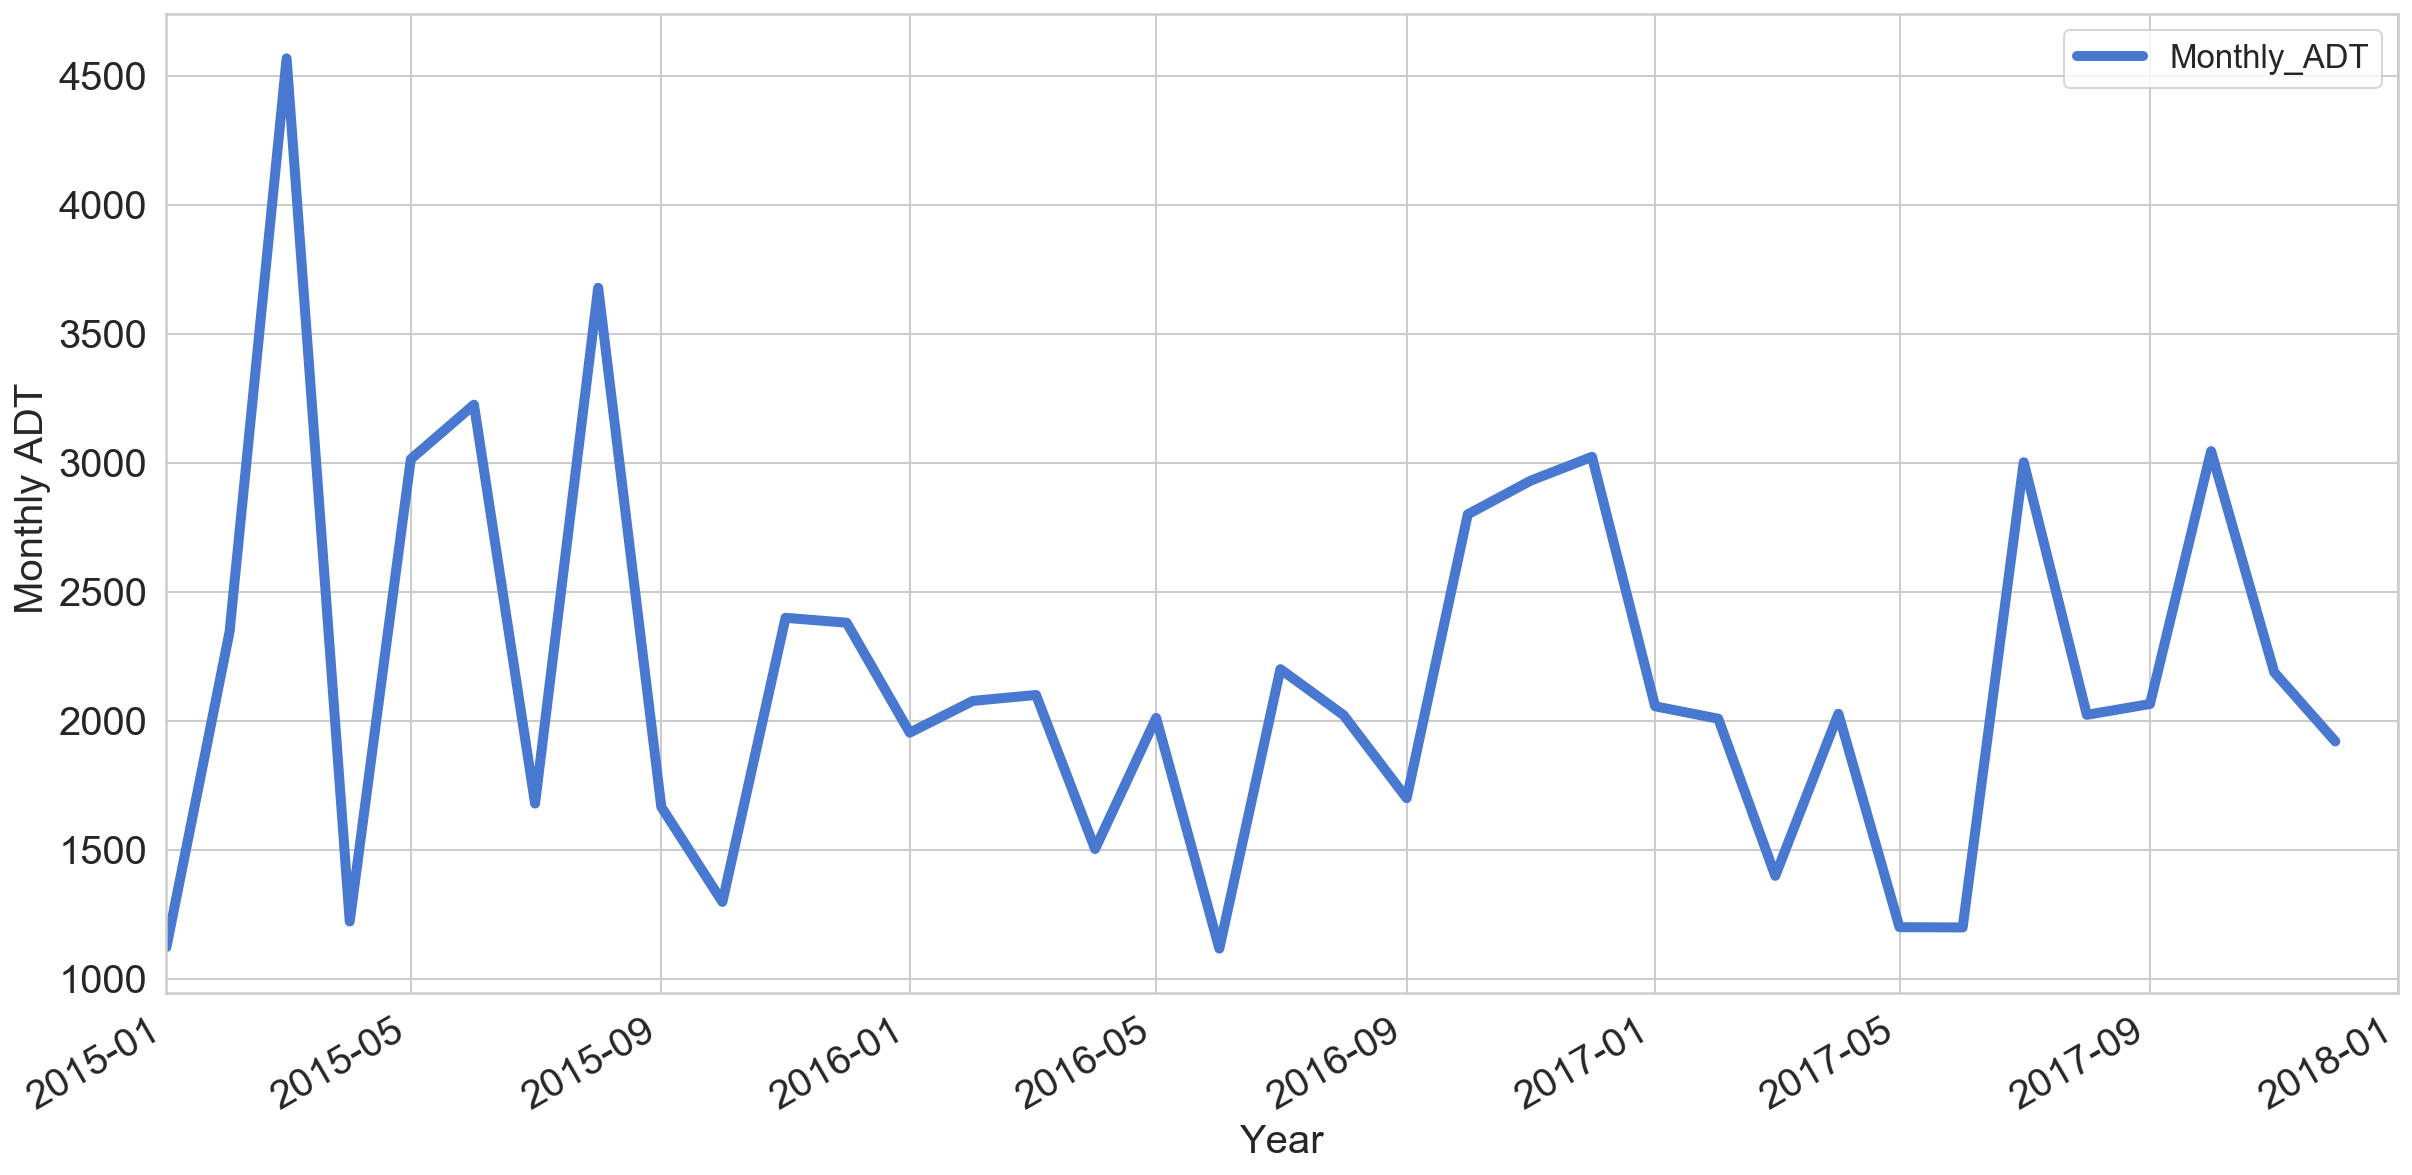

In [226]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlim('2015', '2018')
plt.xlabel('Year', fontsize=20);
plt.ylabel(' Monthly ADT', fontsize=20);



In [158]:
df = df.reset_index()

# Creating a Test and Train Dataset


In [159]:
from sklearn.model_selection import train_test_split

In [123]:
#train, test = train_test_split(df, test_size=0.30,random_state=0)
train=df[0:29]
test=df[29:]

# Linear Regression Modelling

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Monthly_ADT']

In [126]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Calculating The Slope and Intercept

In [127]:
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
print('Intercept: ', model.intercept_)

Slope:  -20.28325123152709
Intercept:  2446.862068965517


/Users/appleretina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


# Predicted ADT vs Actual ADT Plot

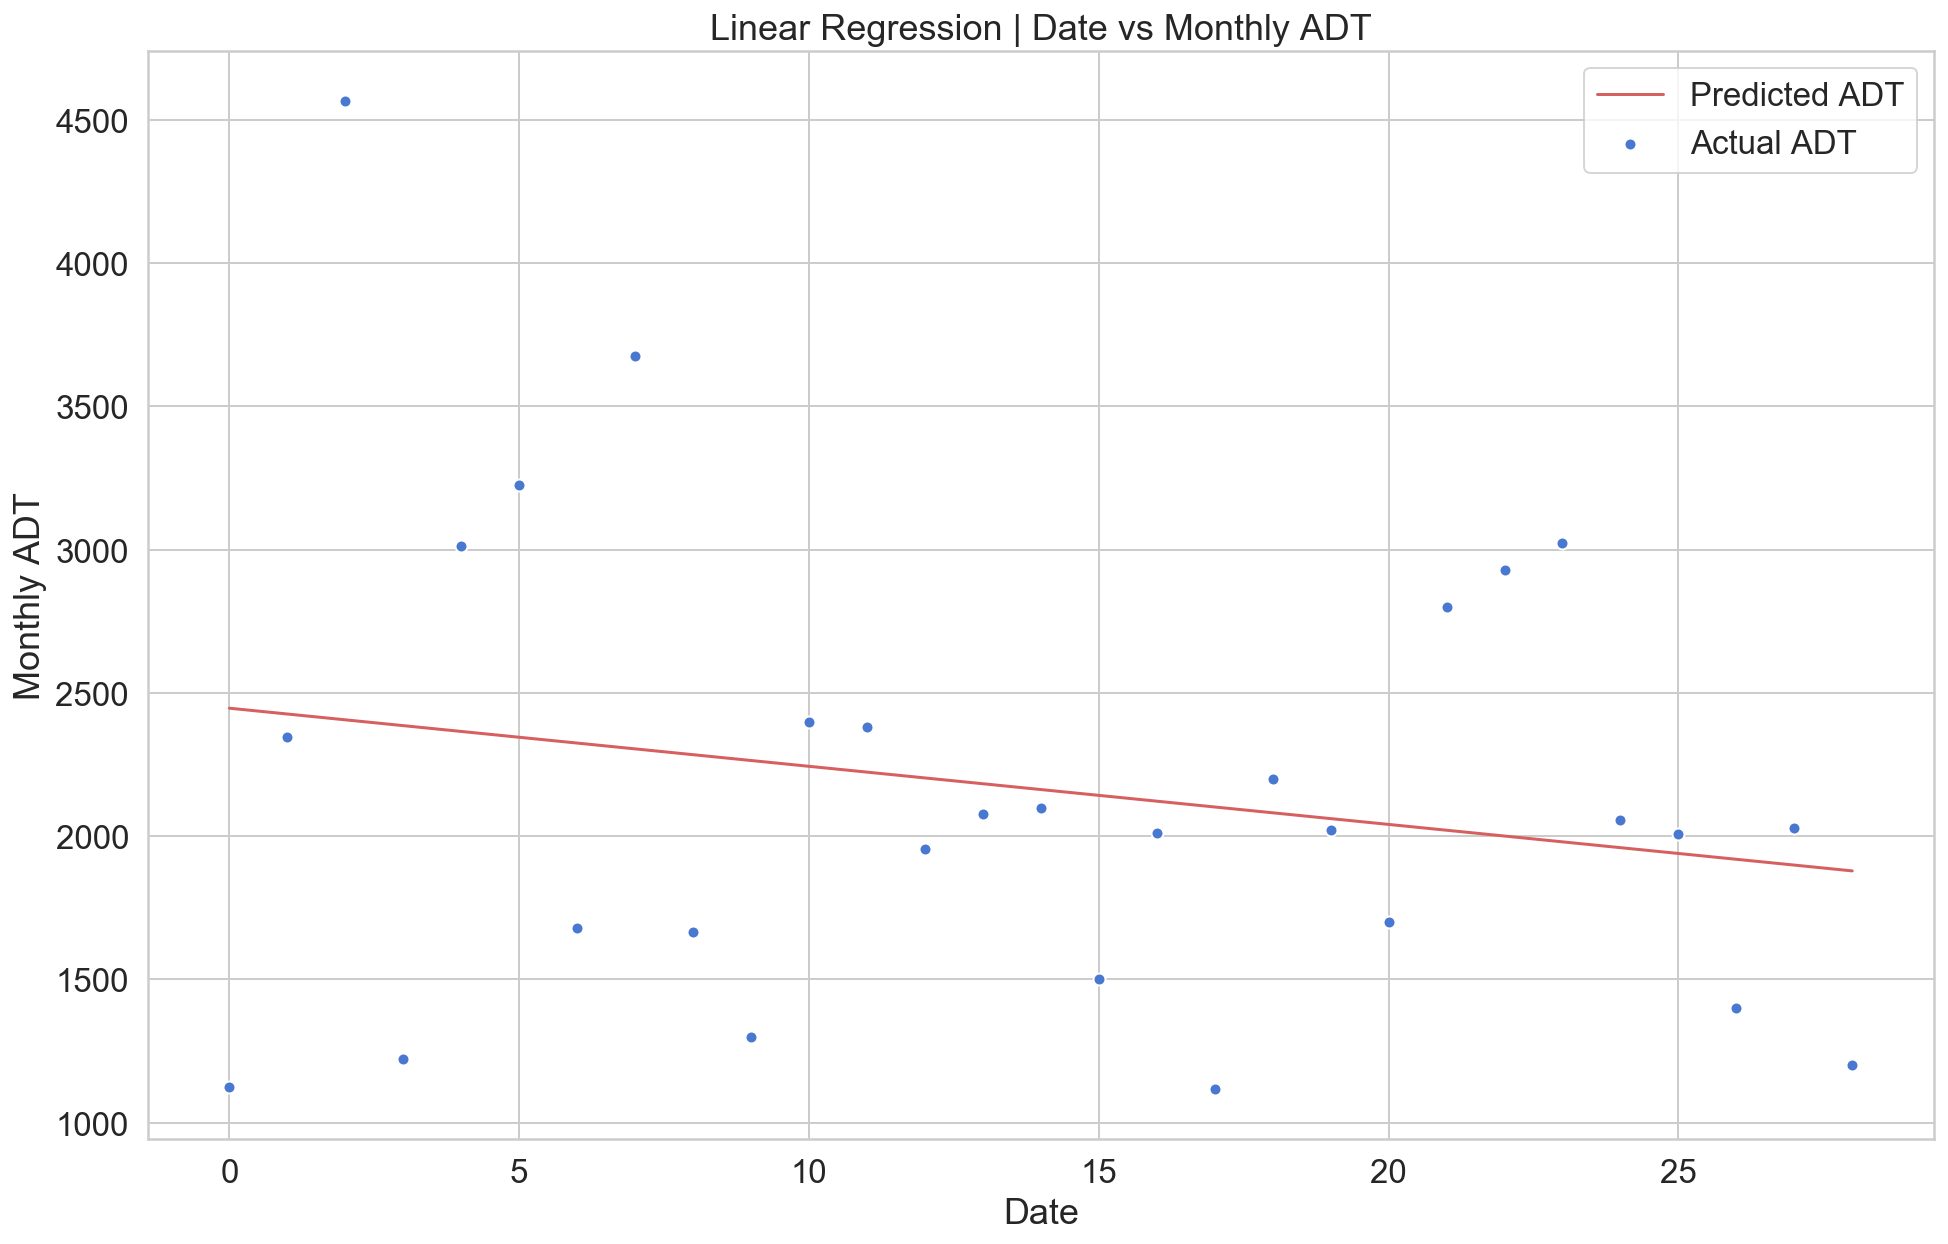

In [128]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Date vs Monthly ADT')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual ADT')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted ADT')
plt.xlabel('Date')
plt.ylabel('Monthly ADT')
plt.legend()
plt.show()

In [129]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Monthly_ADT']

In [130]:
y_pred = model.predict(X_test)

# Values

In [228]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
29,1199,1858.647783
30,3002,1838.364532
31,2023,1818.081281
32,2065,1797.798030
33,3045,1777.514778
34,2188,1757.231527
35,1920,1736.948276


In [229]:
data1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Error': abs(y_test-y_pred)/100})
data1

,Actual,Predicted,Error
29,1199,1858.647783,6.596478
30,3002,1838.364532,11.636355
31,2023,1818.081281,2.049187
32,2065,1797.798030,2.672020
33,3045,1777.514778,12.674852
34,2188,1757.231527,4.307685
35,1920,1736.948276,1.830517


In [230]:
data2

,Actual,Predicted


In [231]:
data1=data

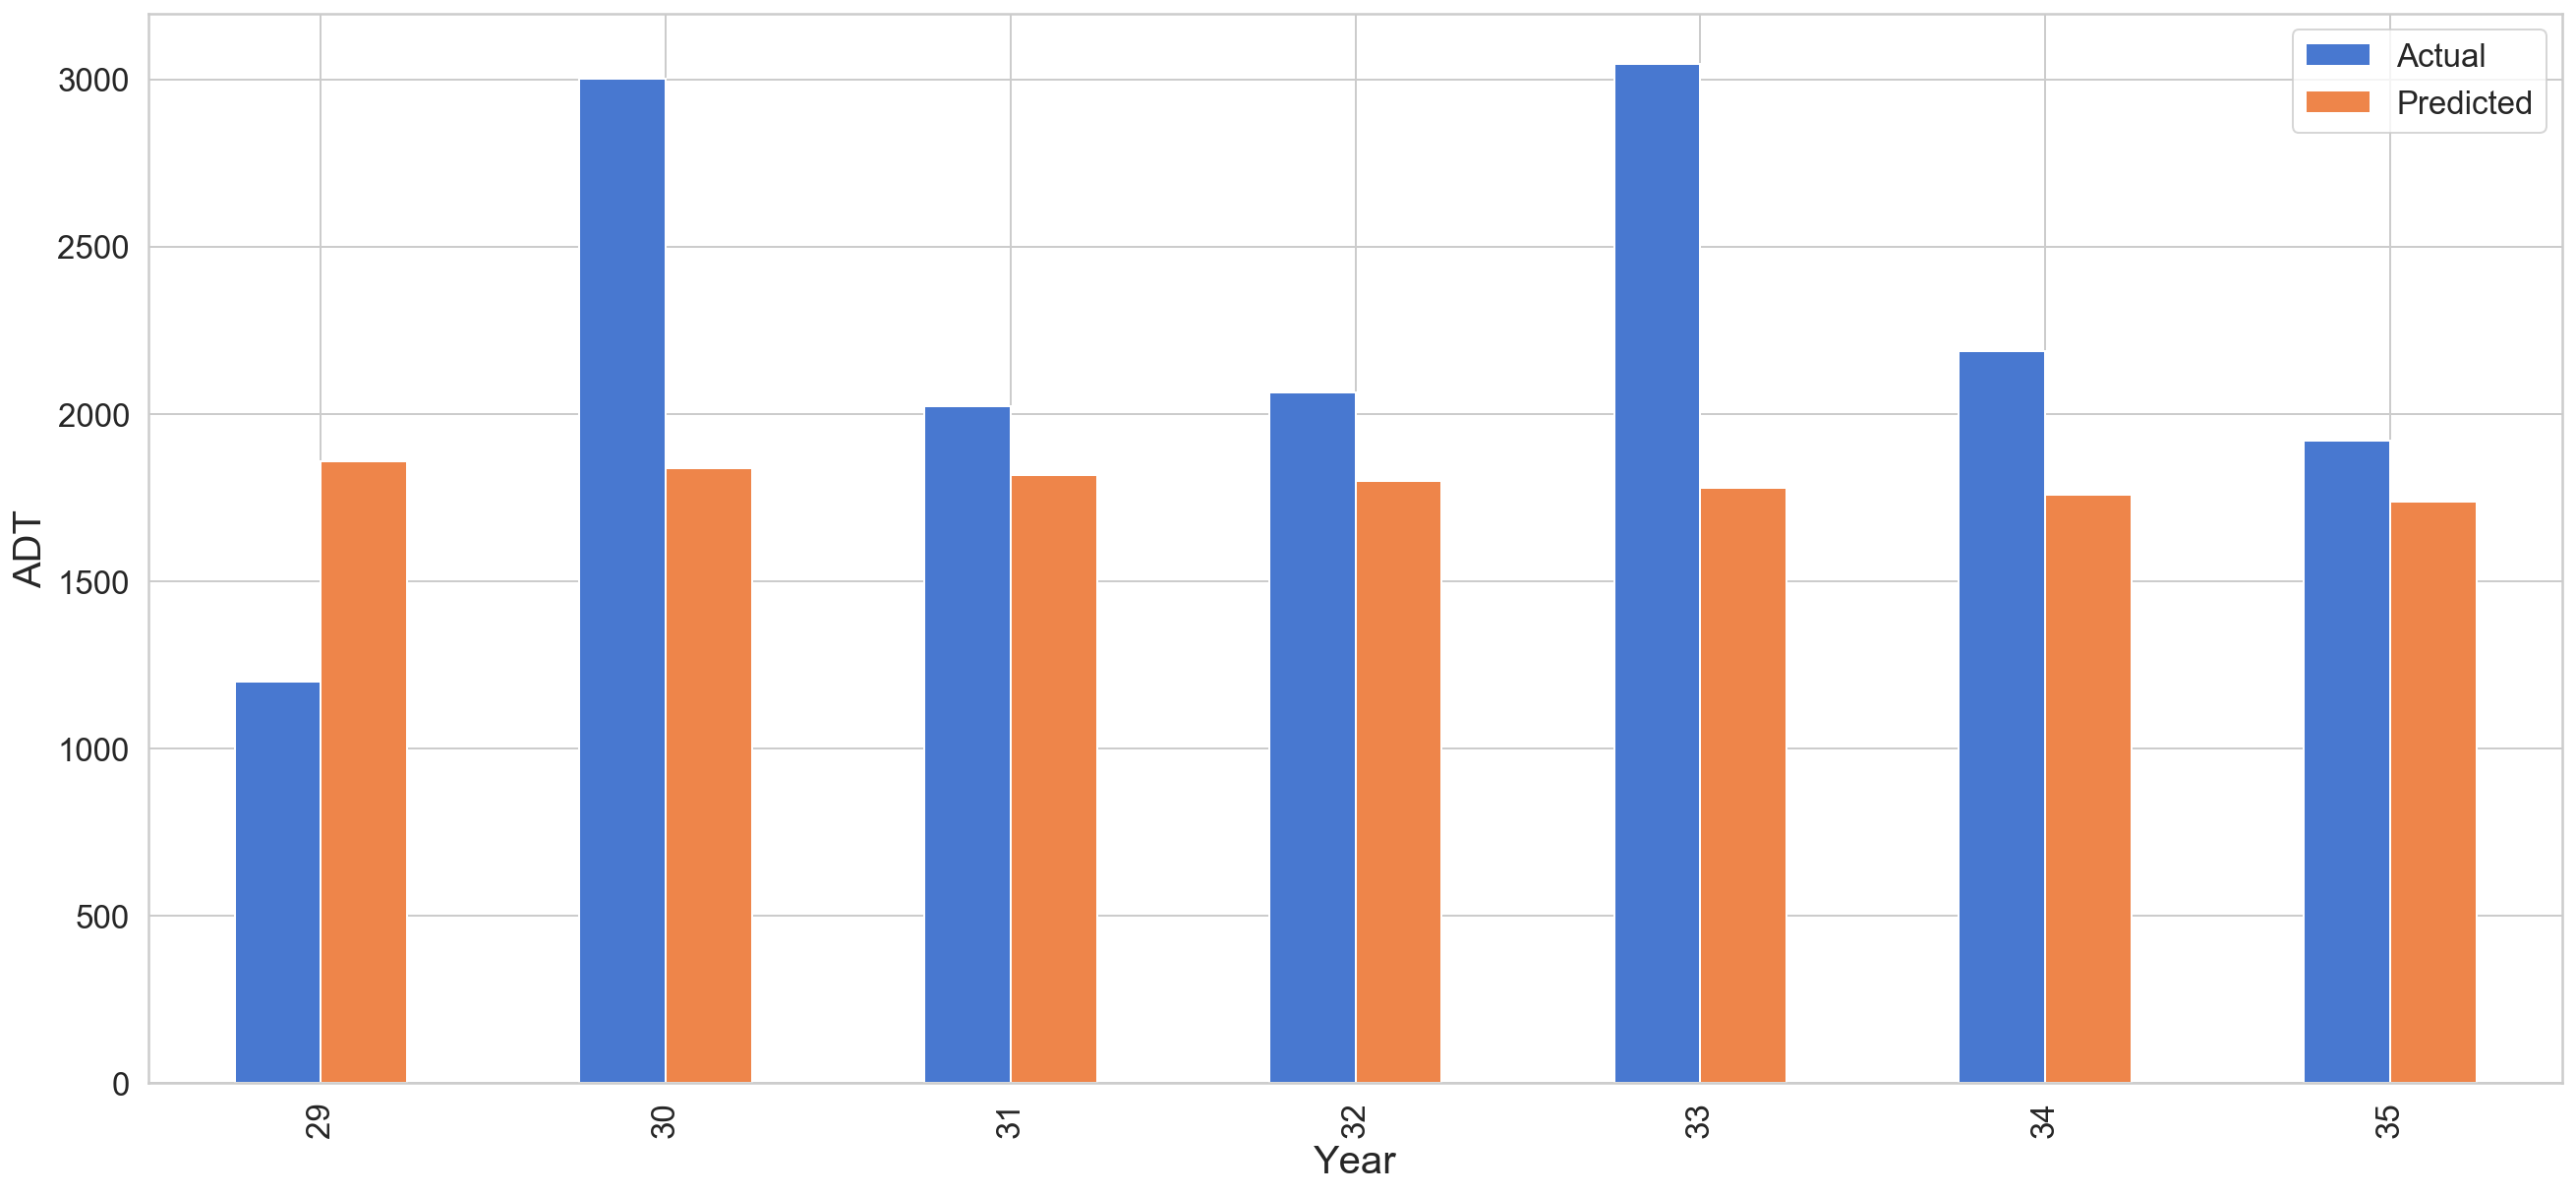

In [233]:
data.plot(kind='bar')

plt.xlabel('Year', fontsize=20);
plt.ylabel('ADT', fontsize=20);

# Regression Effeciency Results

In [21]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model1=sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:            Monthly_ADT   R-squared (uncentered):                   0.589
Model:                            OLS   Adj. R-squared (uncentered):              0.575
Method:                 Least Squares   F-statistic:                              40.19
Date:                Wed, 01 Apr 2020   Prob (F-statistic):                    7.37e-07
Time:                        19:26:10   Log-Likelihood:                         -252.78
No. Observations:                  29   AIC:                                      507.6
Df Residuals:                      28   BIC:                                      508.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# MAPE Calculation

In [22]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +       np.abs(y_true))))

In [23]:
error2 = smape_kun(y_test, y_pred)
accuracy=100-error2
print('Symmetric mean absolute percentage error: %.3f' % error2)


Symmetric mean absolute percentage error: 28.592


# Results

# Three Year Regression Period Analysis

Test and Train Data

In [24]:
train=df[0:36]
test=df[0:36]

In [25]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Monthly_ADT']

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
print('Intercept: ', model.intercept_)

Slope:  -9.071557271557273
Intercept:  2330.03003003003


/Users/appleretina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


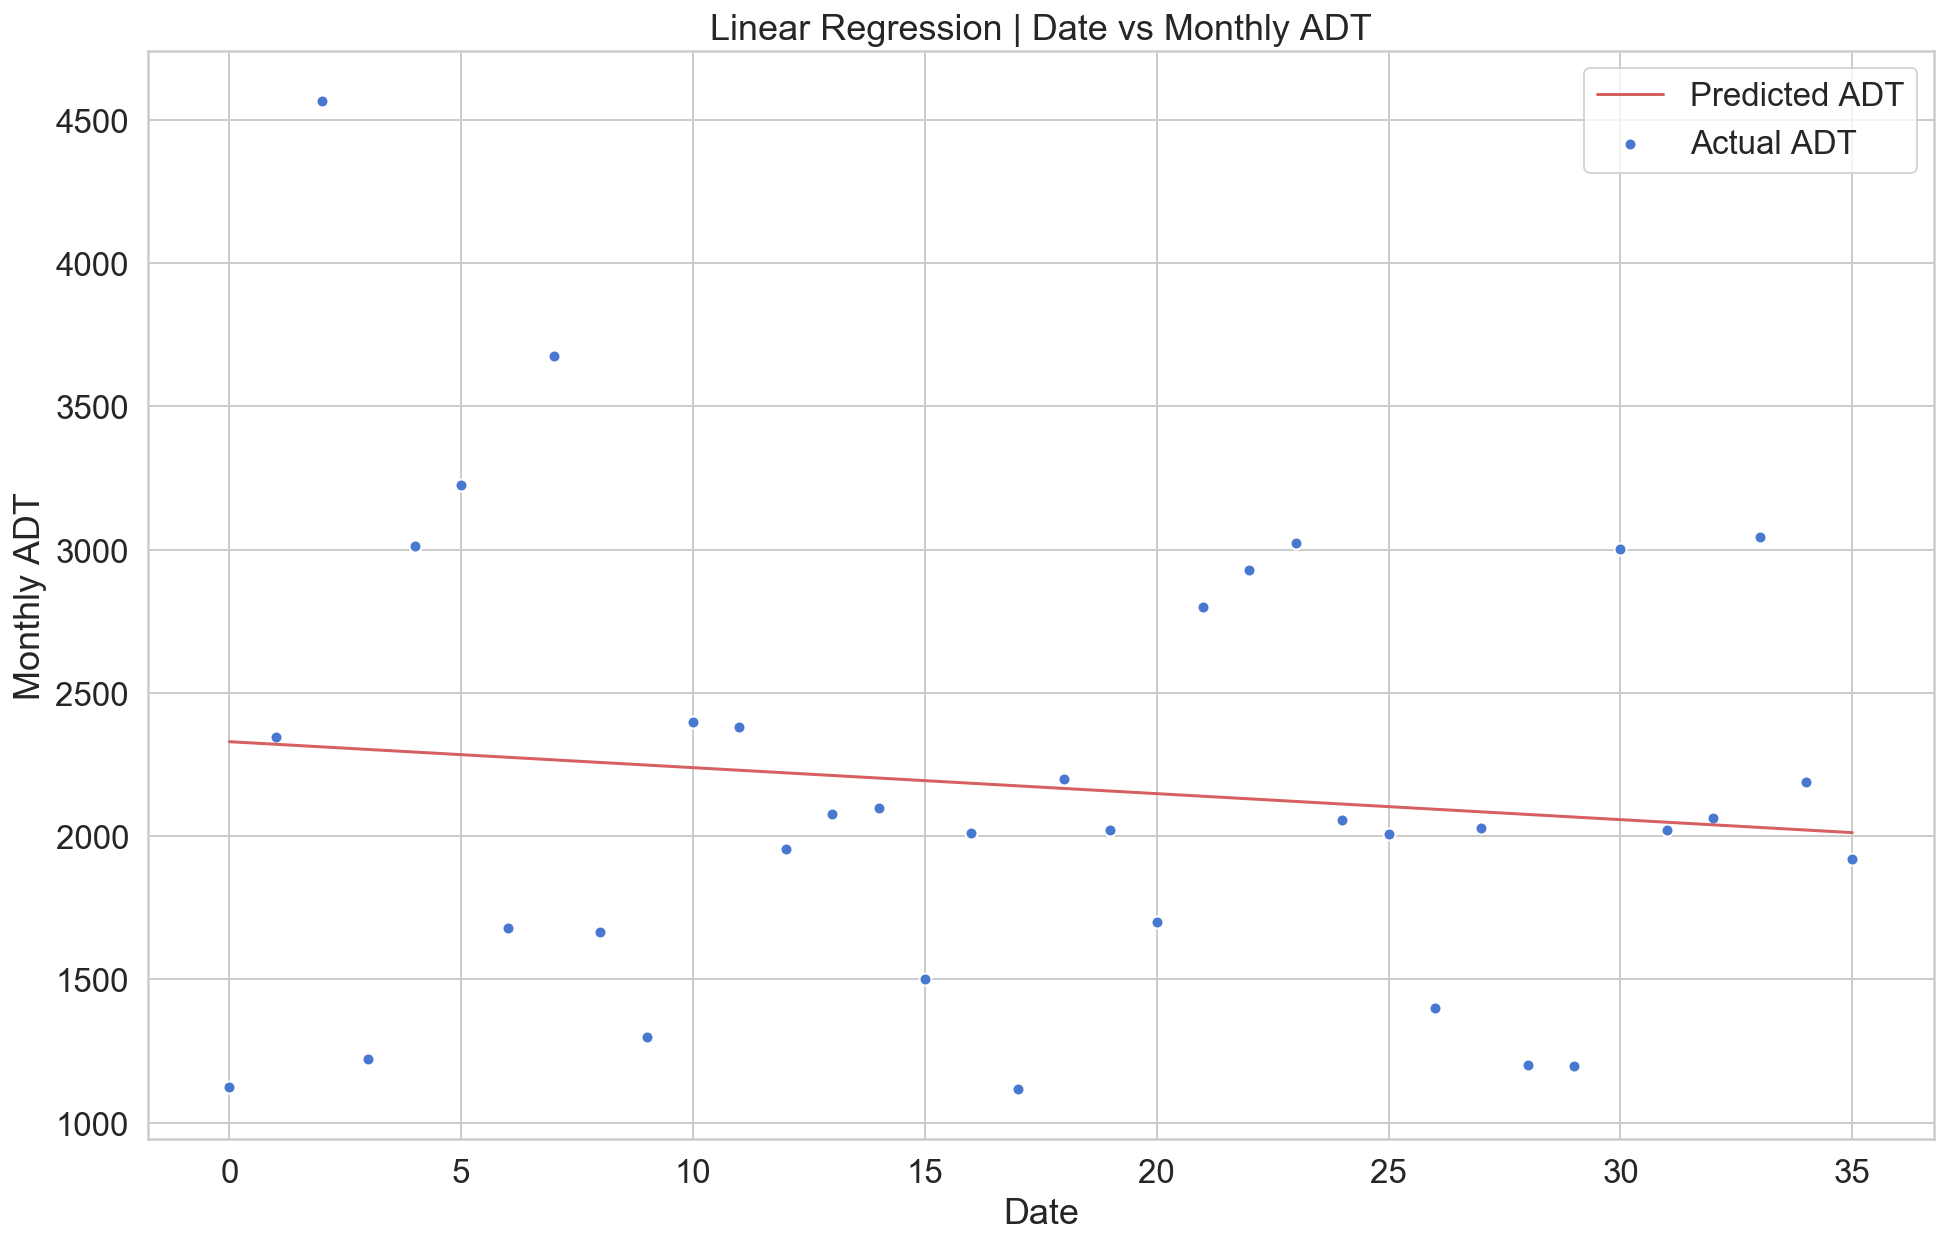

In [28]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Date vs Monthly ADT')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual ADT')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted ADT')
plt.xlabel('Date')
plt.ylabel('Monthly ADT')
plt.legend()
plt.show()

In [29]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Monthly_ADT']

In [30]:
y_pred = model.predict(X_test)

In [31]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error%': abs(y_test-y_pred)/100})
data

,Actual,Predicted,Error%
0,1123,2330.030030,12.070300
1,2345,2320.958473,0.240415
2,4567,2311.886915,22.551131
3,1222,2302.815358,10.808154
4,3014,2293.743801,7.202562
5,3225,2284.672244,9.403278
6,1679,2275.600686,5.966007
7,3678,2266.529129,14.114709
8,1666,2257.457572,5.914576
9,1298,2248.386015,9.503860


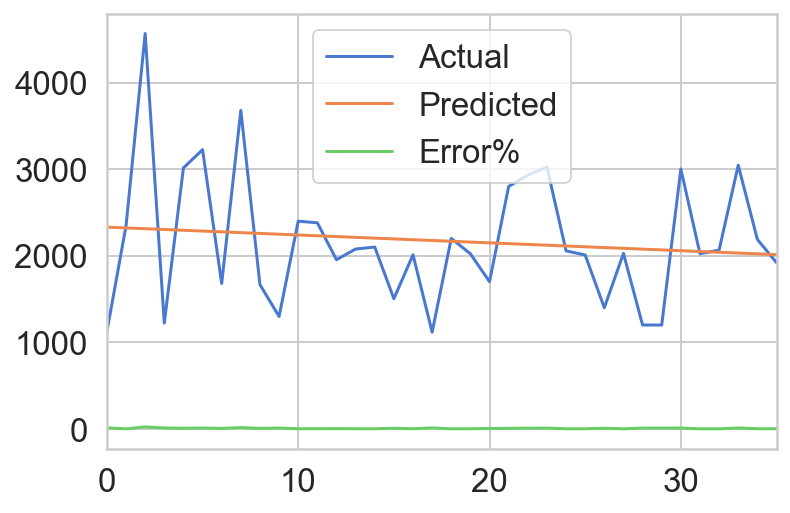

In [32]:
data.plot(kind='line' )

# MAPE Graph

In [210]:
data = [[int(error2),72], [15, 85]] 

In [211]:
df = pd.DataFrame(data, columns = ['MAPE', 'Accuracy'], index=['LSLR', 'ARIMA'])

In [212]:
df

,MAPE,Accuracy
LSLR,28,72
ARIMA,15,85


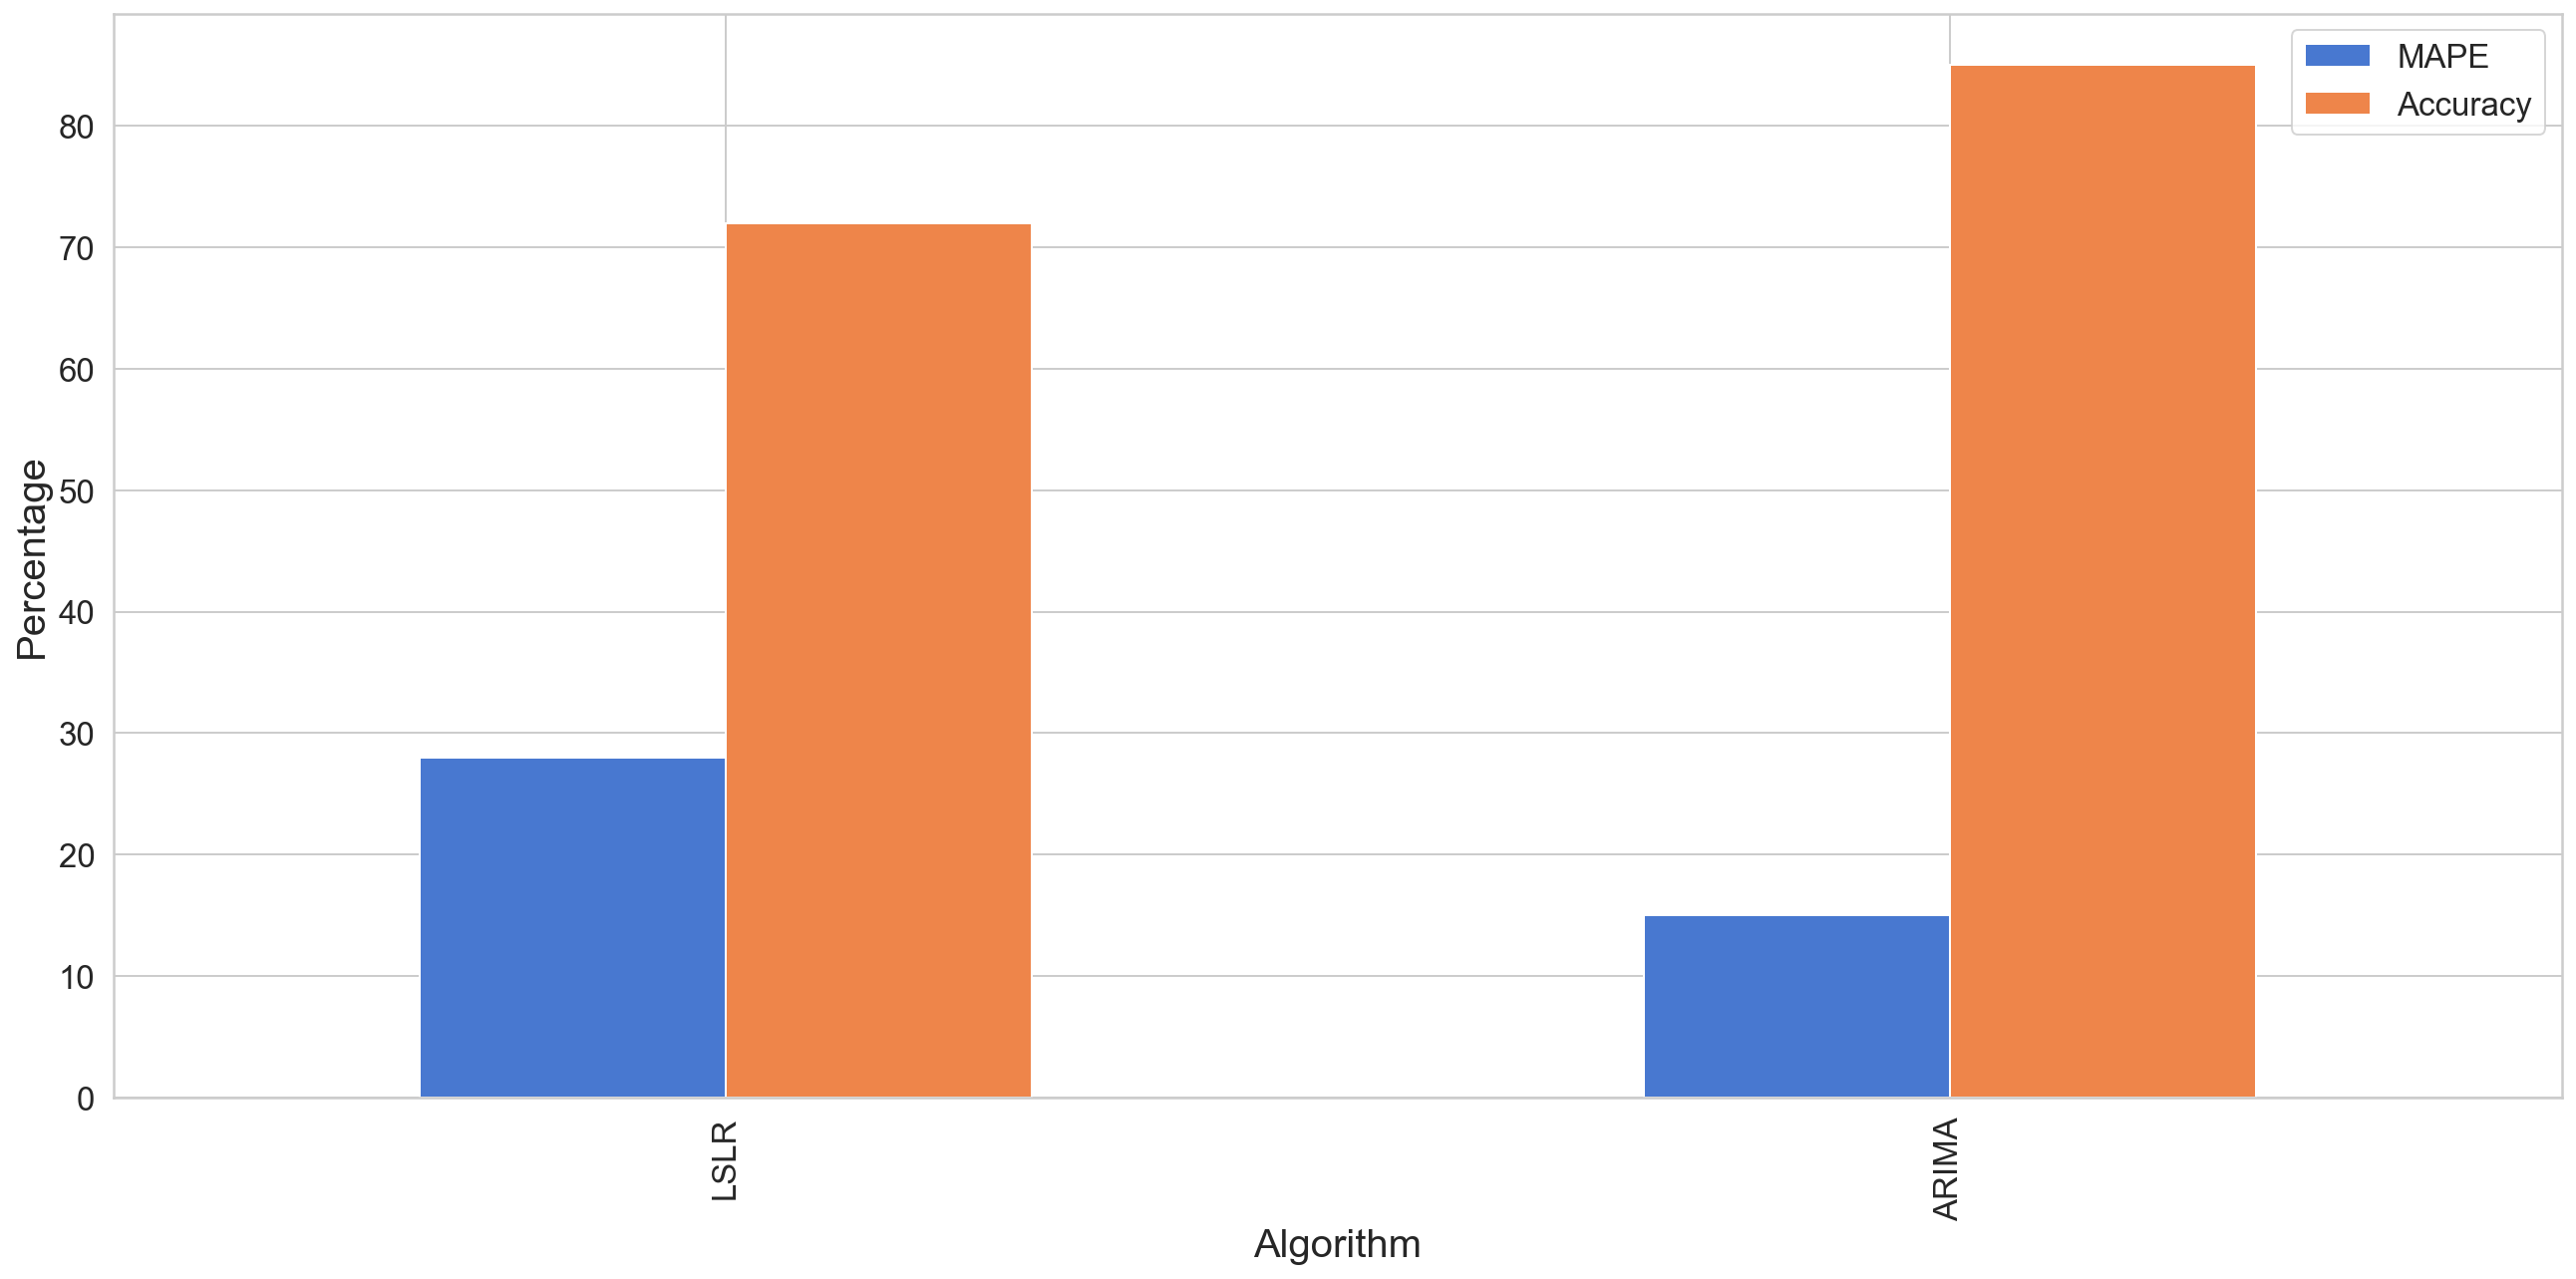

In [215]:
df.plot(kind="bar")
plt.xlabel('Algorithm', fontsize=20);
plt.ylabel('Percentage', fontsize=20);

In [237]:
data = [[.589], [.69]] 

In [238]:
df = pd.DataFrame(data, columns = ['R2 Value'], index=['LSLR', 'ARIMA'])

In [239]:
df

,R2 Value
LSLR,0.589
ARIMA,0.690


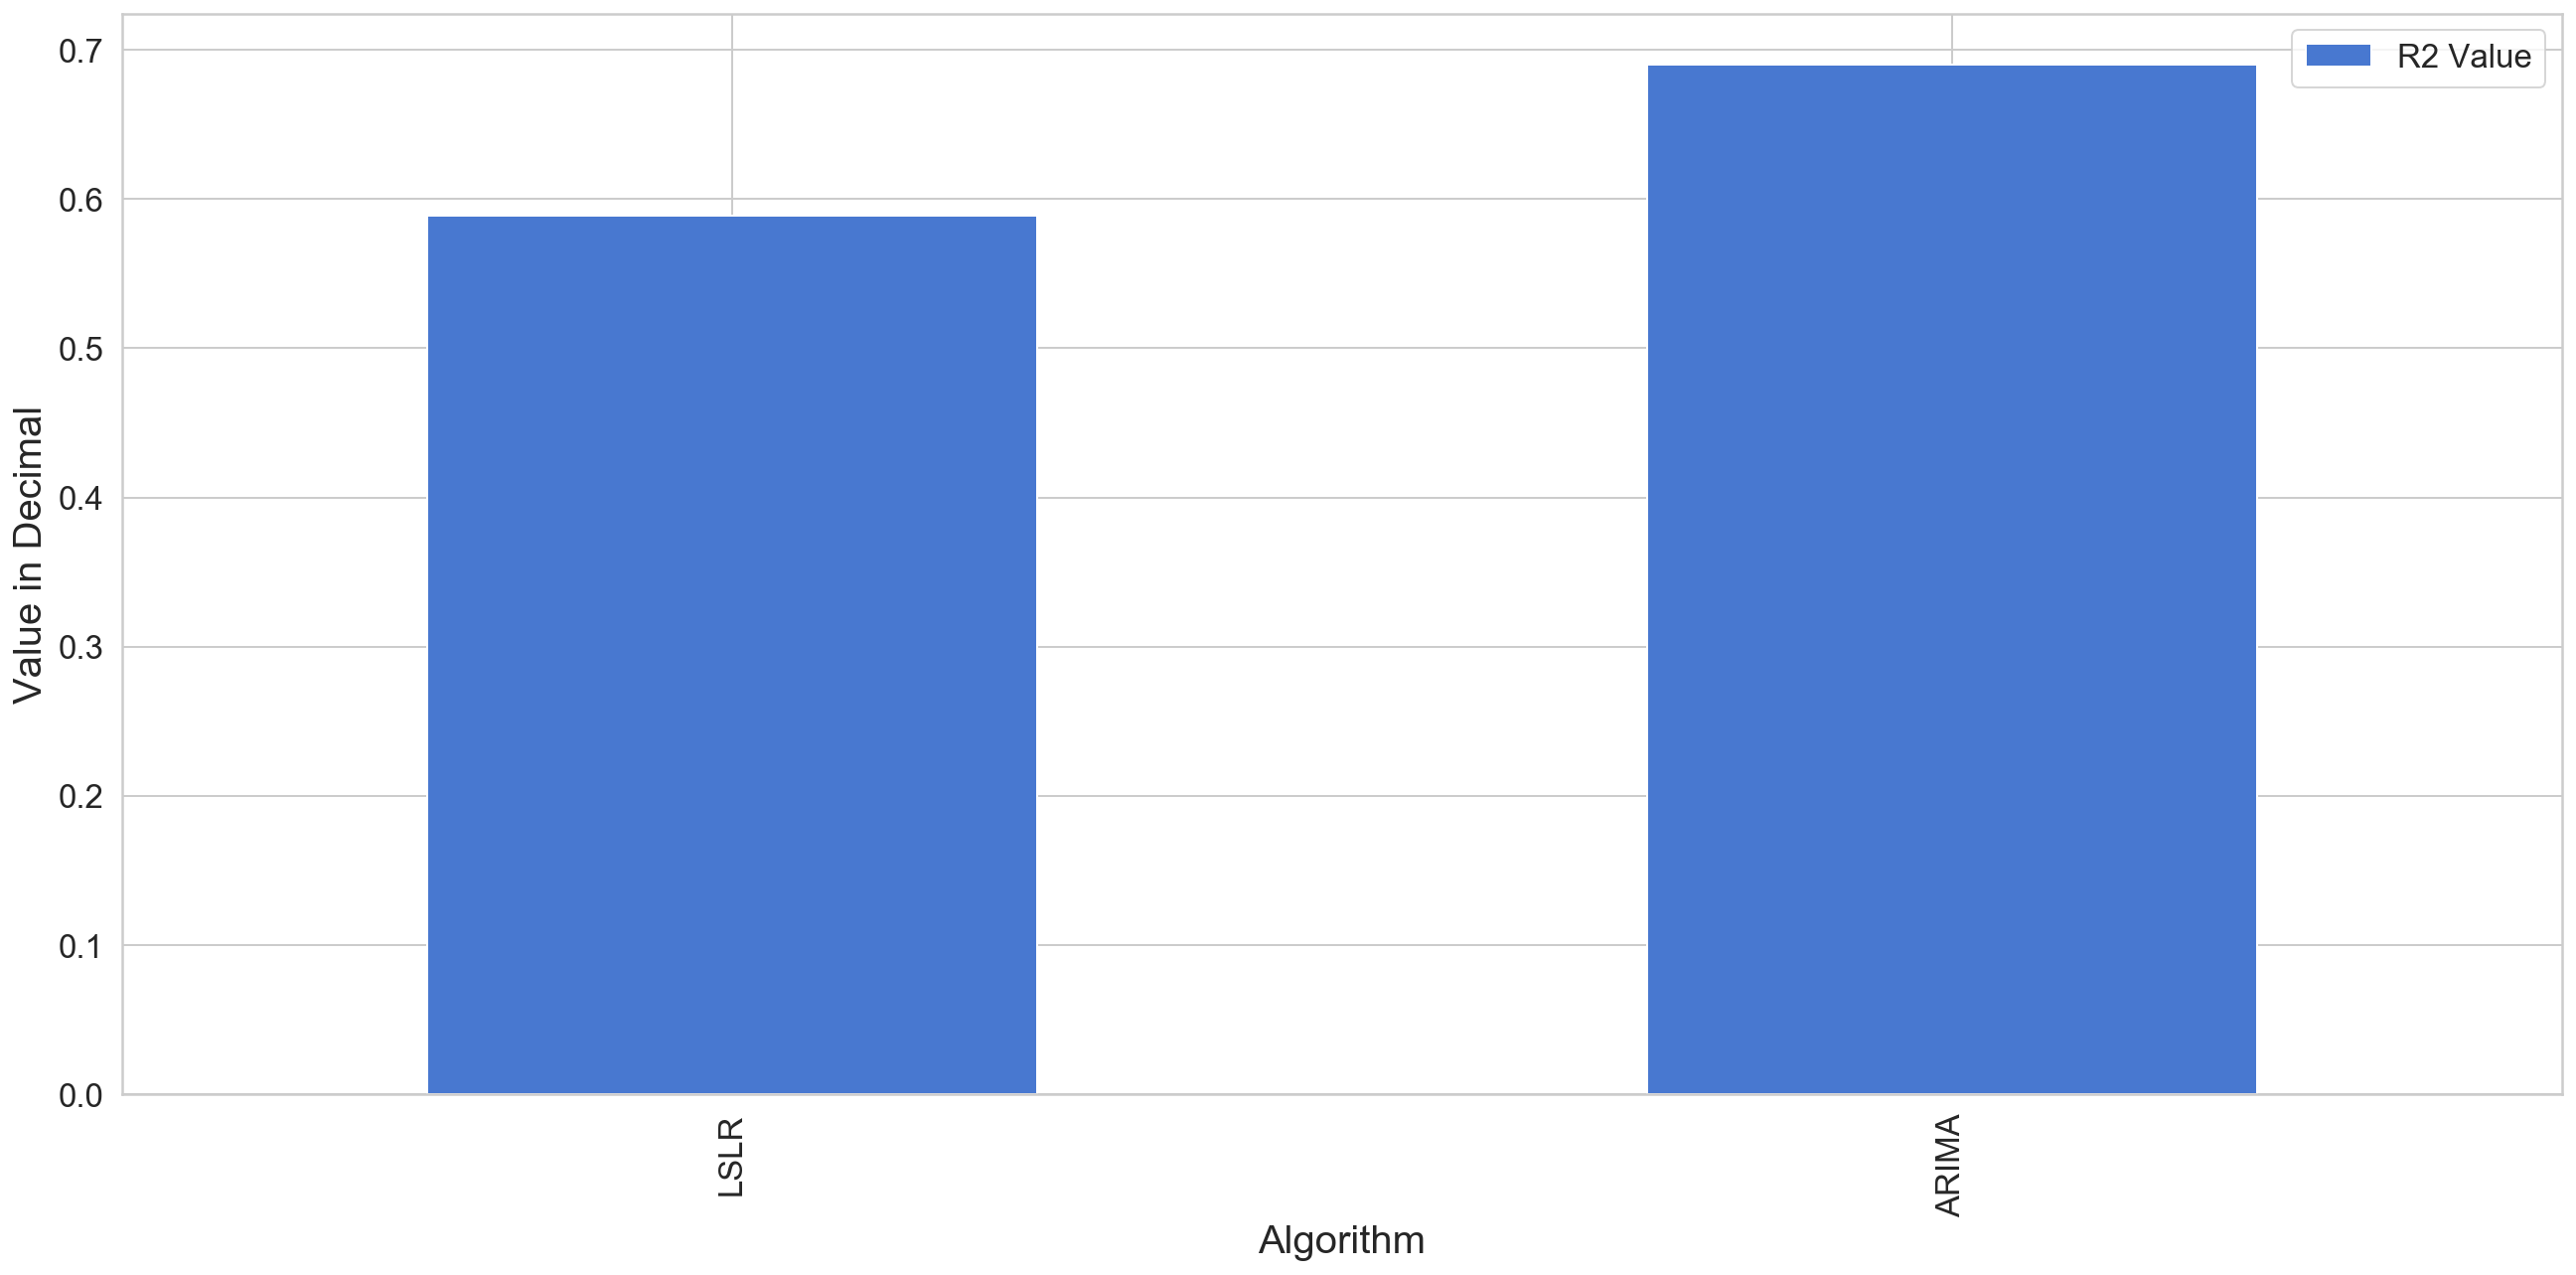

In [240]:
df.plot(kind="bar")
plt.xlabel('Algorithm', fontsize=20);
plt.ylabel('Value in Decimal', fontsize=20);